# Deep Learning with Python

# 2. Before we begin : the mathematical building blocks of neural networks

# p27 : 2.1 A first look at a neural network

In [1]:
import tensorflow as tf

tf.keras.__version__

'2.4.0'

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(type(train_images))

<class 'numpy.ndarray'>


In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
test_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [6]:
from keras import models
from keras import layers

# 단방향 모델 정의
network = models.Sequential()

# 모델에 layer 추가
network.add(layers.Flatten(input_shape = (28, 28)))
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28, )))
network.add(layers.Dense(10, activation = 'softmax'))

In [7]:
# 모델의 학습 방법 설정
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [8]:
from keras.utils import to_categorical

train_normalized = train_images / 255
test_normalized = test_images / 255

train_categories = to_categorical(train_labels)
test_categories = to_categorical(test_labels)

In [9]:
test_categories[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
# 모델 학습, epochs와 batch_size 지정
network.fit(train_normalized, train_categories, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.4269 - accuracy: 0.8747
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1062 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0685 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0486 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0342 - accuracy: 0.9895


In [11]:
# testset을 이용한 성능 평가, evaluate 메소드 사용
test_loss, test_acc = network.evaluate(test_normalized, test_categories)

313/313 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9785


In [12]:
print("Test accuracy : {}".format(round(test_acc, 4)))

Test accuracy : 0.9785


# p31 : 2.2 Data representations for neural networks

In [13]:
import numpy as np

In [14]:
# scalar = 0D tensor

x0 = np.array(12)
print(x0)
print(x0.ndim)

12
0


In [15]:
# vector = 1D tensor

x1 = np.array([12, 3, 6, 14])
print(x1)
print(x1.ndim)

[12  3  6 14]
1


In [16]:
# matrix = 2D tensor

x2 = np.round(np.random.randn(3, 5), 2)
print(x2)
print(x2.ndim)

[[-1.55  0.38 -1.08  1.63 -1.2 ]
 [ 0.35 -1.95  1.09 -0.18  0.09]
 [-1.36  1.51  1.69 -0.08 -0.71]]
2


In [17]:
# 3D tensor

x3 = np.round(np.random.randn(3, 4, 5), 2)
print(x3)
print(x3.ndim)

[[[-2.13 -0.07 -0.14 -0.17  0.69]
  [ 1.19 -0.45 -0.99  0.19 -0.19]
  [-0.25 -0.33 -0.64 -1.28  0.31]
  [-0.87  0.17 -1.22 -0.36 -0.48]]

 [[-1.46 -0.24 -1.61 -1.94  0.01]
  [-0.39 -1.64 -1.1   0.63  0.09]
  [ 0.17 -0.2  -0.49 -0.71  0.08]
  [-1.95  0.53  0.64  0.23  1.5 ]]

 [[-0.57  0.5  -0.07 -1.69 -0.62]
  [-0.88  1.69  2.3  -1.27 -0.3 ]
  [ 1.36 -0.12  0.07 -0.51 -0.45]
  [-0.34  1.65 -0.31  0.9  -0.52]]]
3


In [18]:
print(x3.ndim)
print(x3.shape)
print(x3.dtype)

3
(3, 4, 5)
float64


In [19]:
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


In [20]:
import matplotlib
import matplotlib.pyplot as plt

In [21]:
digit = train_images[4]

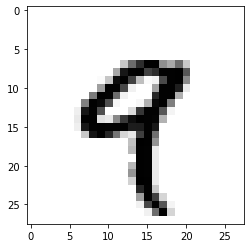

In [22]:
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [23]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [24]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [25]:
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


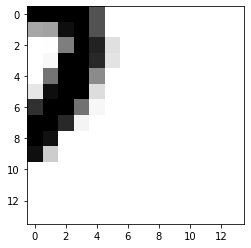

In [26]:
my_slice = train_images[10, 14:, 14:]

plt.imshow(my_slice, cmap = plt.cm.binary)
plt.show()

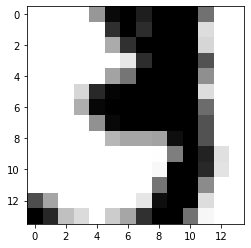

In [27]:
my_slice = train_images[10, 7:-7, 7:-7]

plt.imshow(my_slice, cmap = plt.cm.binary)
plt.show()

In [28]:
batch_0 = train_images[:128]
batch_1 = train_images[128:256]
# ...으로 나눠서 학습한다는 것이 batch의 개념

# p38 : 2.3 The gears of neural networks : tensor operations

element-wise calculation  
broadcasting  
tensor dot  
tensor reshape  

# p46 : 2.4 The engine of neural networks : gradient-based optimization

 # Chapter summary

1. Learning means finding a combination of model parameters that minimizes a loss function for a given set of training data samples and their corresponding targets.

2. Learning happens by drawing random batches of data samples and their
targets, and computing the gradient of the network parameters with
respect to the loss on the batch. The network parameters are then moved
a bit (the magnitude of the move is defined by the learning rate) in the
opposite direction from the gradient.

3. The entire learning process is made possible by the fact that neural networks are chains of differentiable tensor operations, and thus it’s possible
to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value.

4. Two key concepts you’ll see frequently in future chapters are loss and optimizers. These are the two things you need to define before you begin feeding data into a network.

5. The loss is the quantity you’ll attempt to minimize during training, so it
should represent a measure of success for the task you’re trying to solve.

6. The optimizer specifies the exact way in which the gradient of the loss will
be used to update parameters: for instance, it could be the RMSProp optimizer, SGD with momentum, and so on.